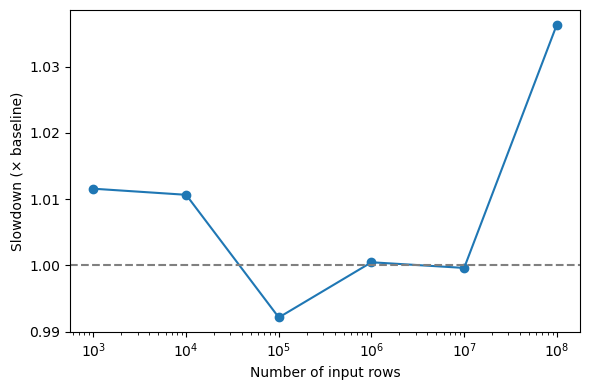

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

base = pd.read_csv("scaling_results_without_provenance.csv")
prov = pd.read_csv("scaling_results_with_provenance.csv")

ratio = prov["total_time"] / base["total_time"]

plt.figure(figsize=(6,4))
plt.semilogx(base["n_rows_input"], ratio, marker="o")
plt.axhline(1.0, color="gray", linestyle="--")
plt.ylabel("Slowdown (× baseline)")
plt.xlabel("Number of input rows")
plt.tight_layout()
plt.show()


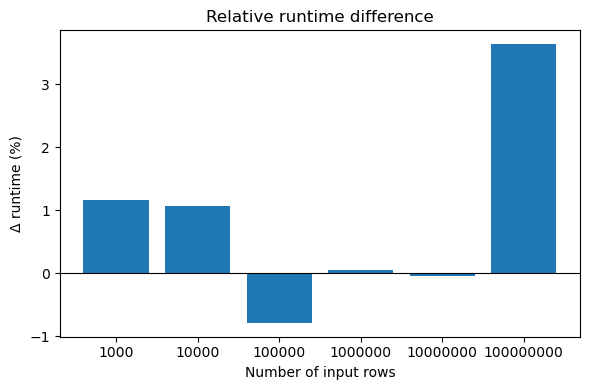

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
base = pd.read_csv("scaling_results_without_provenance.csv")
prov = pd.read_csv("scaling_results_with_provenance_why_data.csv")

# Compute percentage difference
delta_pct = (prov["total_time"] - base["total_time"]) / base["total_time"] * 100
plt.figure(figsize=(6, 4))

plt.bar(
    base["n_rows_input"].astype(str),
    delta_pct,
)

plt.axhline(0, color="black", linewidth=0.8)

plt.xlabel("Number of input rows")
plt.ylabel("Δ runtime (%)")
plt.title("Relative runtime difference")

plt.tight_layout()
plt.show()


In [11]:
df_results = pd.DataFrame({"time": [10**n for n in range(3,len(delta_pct)+3)],"Δ%":delta_pct.round(2)})
df_results

,time,Δ%
0,1000,1.16
1,10000,1.07
2,100000,-0.79
3,1000000,0.05
4,10000000,-0.04
5,100000000,3.64


In [9]:
delta_pct

0    1.157699
1    1.065742
2   -0.787745
3    0.046430
4   -0.039103
5    3.636538
Name: total_time, dtype: float64

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
base = pd.read_csv("scaling_results_without_provenance.csv")
prov = pd.read_csv("scaling_results_with_provenance_why_data.csv")

# Compute percentage differences
delta_initialization = (prov["initialization_time"] - base["initialization_time"]) / base["initialization_time"] * 100
delta_merge = (prov["merge_time"] - base["merge_time"]) / base["merge_time"] * 100
delta_agg = (prov["aggregation_time"] - base["aggregation_time"]) / base["aggregation_time"] * 100
delta_tv = (prov["tablevectorizer_time"] - base["tablevectorizer_time"]) / base["tablevectorizer_time"] * 100

# Combine into a single DataFrame (useful for inspection or LaTeX export)
delta_df = pd.DataFrame({
    "n_rows_input": base["n_rows_input"],
    "Δ initialization_time (%)": delta_initialization,
    "Δ merge_time (%)": delta_merge.round(2),
    "Δ aggregation_time (%)": delta_agg.round(2),
    "Δ tablevectorizer_time (%)": delta_tv.round(2),
})

print(delta_df)


   n_rows_input  Δ merge_time (%)  Δ tablevectorizer_time (%)
0          1000            177.43                       27.41
1         10000             50.51                        1.32
2        100000             35.61                        2.32
3       1000000             21.26                        0.46
4      10000000             22.02                        0.77


In [2]:
delta_df.to_csv("deltas_time.csv",index=False)